# Classification of Time Series ECG using Visibility Graphs

In [1]:
# importing packages
from sklearn.model_selection import train_test_split
import numpy as np

# self-made modules 
from module_Dataset import load_ECG_HVG

## Dataset

### Loading Dataset and Feature Extraction

In [2]:
# paths of csv files
pathNormal = 'ptbdb_normal.csv'
pathAbnormal = 'ptbdb_abnormal.csv'
# numNormal = 100
# numAbnormal = 100
X, y = load_ECG_HVG(pathNormal, pathAbnormal, return_X_y=True)

In [3]:
# save data into npy file
np.save(f'ECGdata.npy', X)
np.save(f'ECGtarget.npy', y)

### Splitting Data into Training and Testing

In [2]:
X, y = np.load('ECGdata.npy'), np.load('ECGtarget.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Normalizing Features

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training Models

In [4]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Classification Report

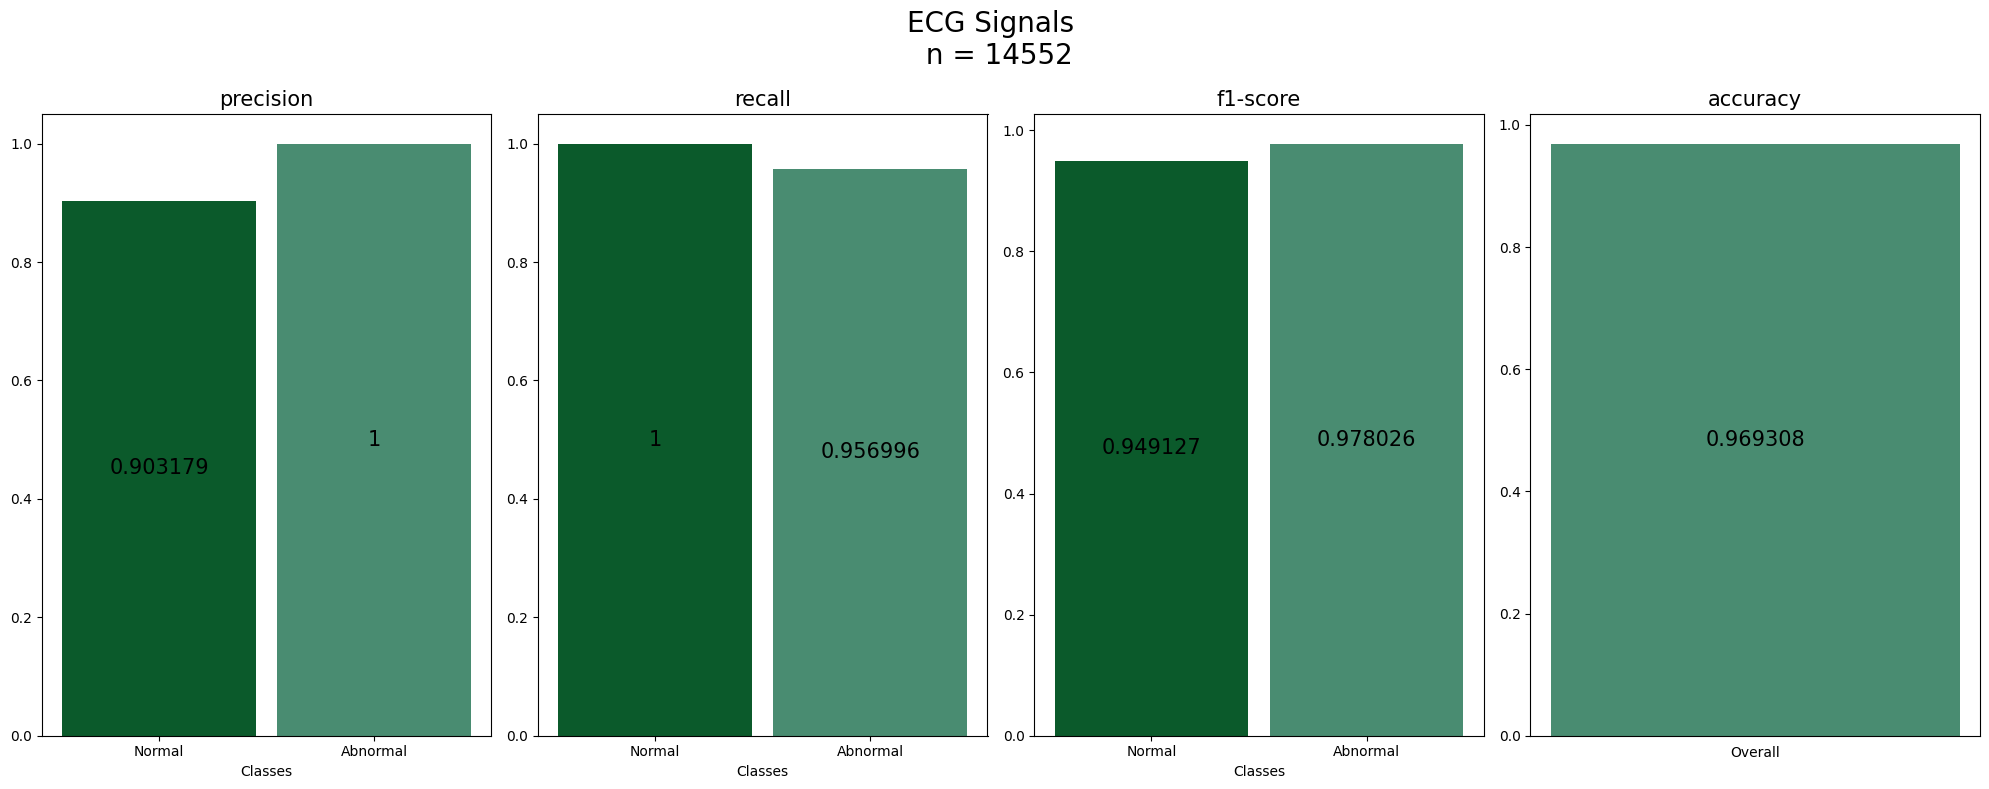

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.metrics import classification_report
from module_ClassificationFunctions import generateGraphReport

classificationReport = classification_report(y_test, LogReg.predict(X_test), output_dict=True)
# print(classificationReport)
generateGraphReport(classificationReport, numData=len(X), save=False)

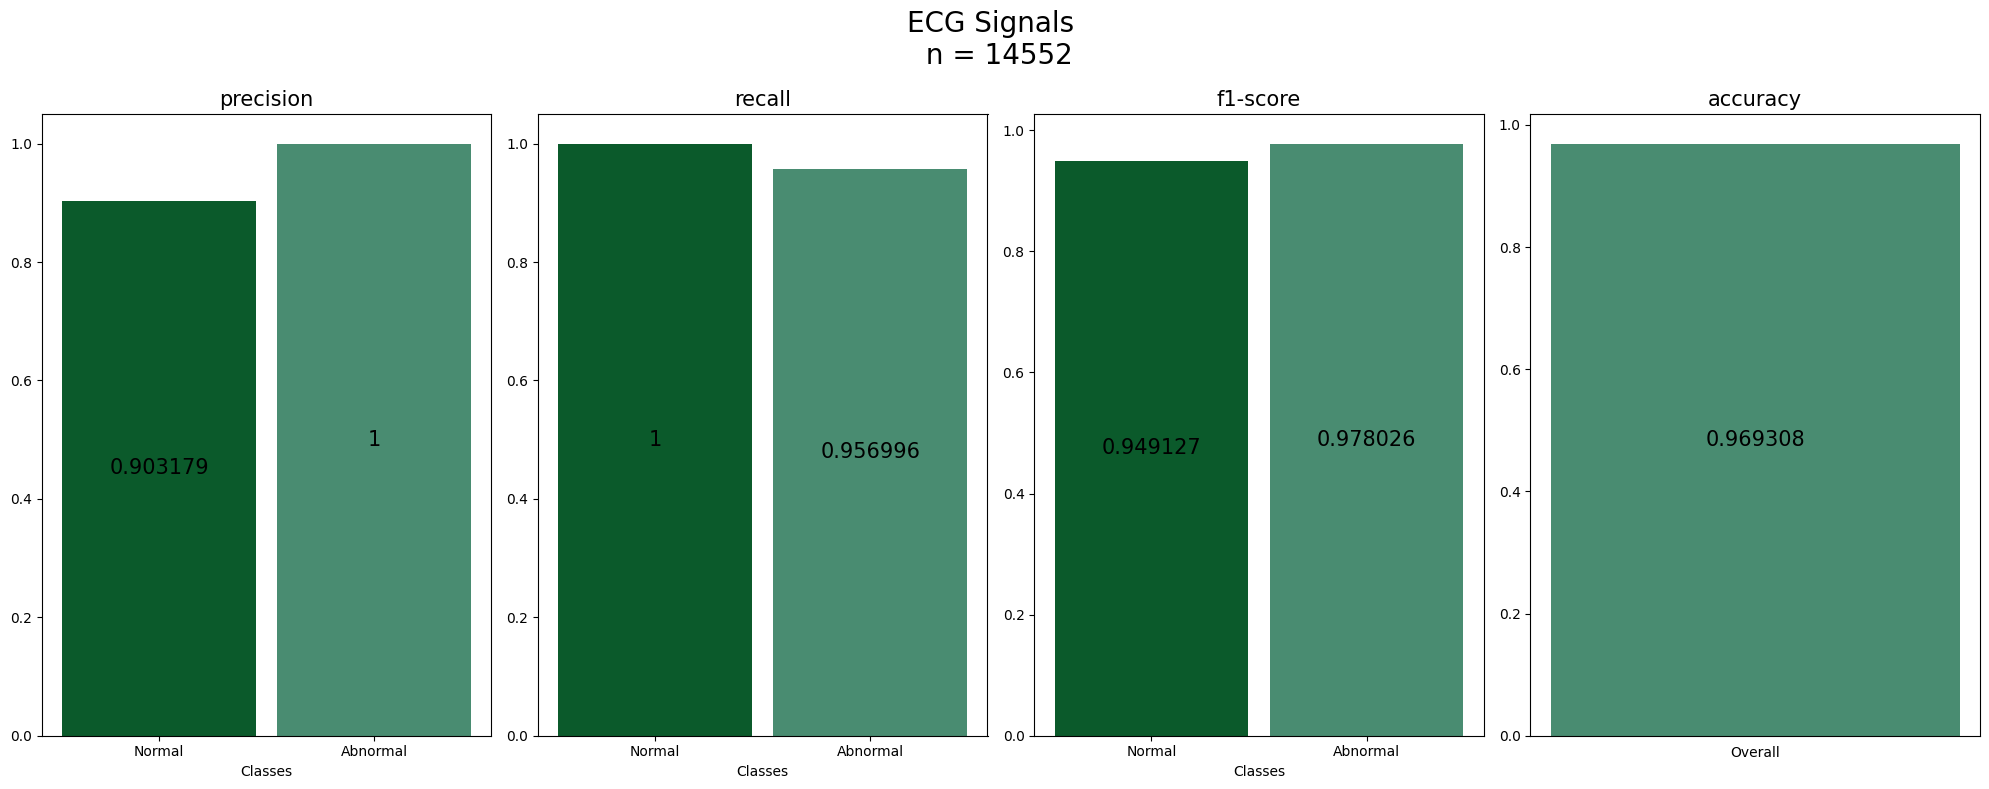

In [49]:
import matplotlib.pyplot as plt

metrics = ['precision', 'recall', 'f1-score', 'accuracy']
classes = ['0.0', '1.0']
colors = ['#0b5a2b', '#498c71']
fig, axs = plt.subplots(1,4, figsize=(20,8))
axs = axs.flatten()

for idx, m in enumerate(metrics):
    if m != 'accuracy':
        measures = []
        for c in classes:
            measures.append(classificationReport[c][m])
        
        x = np.arange(len(classes))
        b = axs[idx].bar(x, measures, width=0.9, color=colors, label=measures)
        axs[idx].bar_label(b, label_type='center', fontsize=15)
        axs[idx].set_title(m, fontsize=15)
        axs[idx].set_xticks(x, ['Normal', 'Abnormal'])
        axs[idx].set_xlabel('Classes')
    else:
        measures = [classificationReport[m]]
        b = axs[idx].bar([0], measures, width=0.1, color=colors[1], label=measures)
        axs[idx].bar_label(b, label_type='center', fontsize=15)
        axs[idx].set_title(m, fontsize=15)
        axs[idx].set_xticks([], color='white')
        axs[idx].set_xlabel('Overall')

fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle(f'ECG Signals \n n = {len(X)}', fontsize=20)
plt.show()